In [67]:
import random as rm
import sys
import matplotlib.pyplot as plt

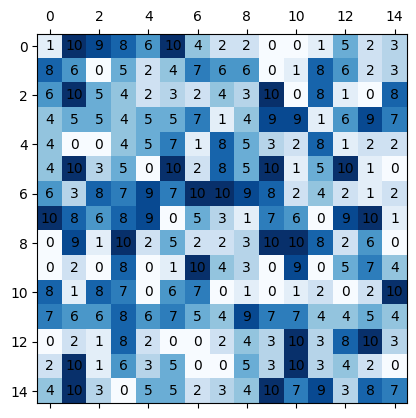

In [68]:
n = 15
m = 15
matrix = [[rm.randint(0, 10) for i in range(n)] for j in range(m)]
matrix

fig, ax = plt.subplots()
ax.matshow(matrix, cmap=plt.cm.Blues)
for i in range(n):
    for j in range(m):
        c = matrix[j][i]
        ax.text(i, j, str(c), va='center', ha='center')

In [69]:
start_i, start_j = int(input('Введите i start точки')), int(input('Введите j start точки'))
stop_i, stop_j = int(input('Введите i stop точки')), int(input('Введите j stop точки'))

# while any((start_i, start_j, stop_i, stop_j) < 0) or any((start_i, start_j), ) 

unvisited_nodes = []
for i in range(n):
    for j in range(m):
        if i == start_i and j == start_j:
            unvisited_nodes.append([matrix[i][j], [i, j]])
        else:
            unvisited_nodes.append([sys.maxsize, [i, j]])

visited_nodes = []

In [70]:
def check_neighbours(i, j, matrix): #проверяем всех соседей точки
    neighbours = []
    if i == 0 and j == 0:
        neighbours.append([matrix[i][j+1], [i, j+1]])
        neighbours.append([matrix[i+1][j], [i+1, j]])
    elif i == 0 and j == len(matrix[i]) - 1:
        neighbours.append([matrix[i][j-1], [i, j-1]])
        neighbours.append([matrix[i+1][j], [i+1, j]])
    elif i == len(matrix) - 1 and j == 0:
        neighbours.append([matrix[i][j+1], [i, j+1]])
        neighbours.append([matrix[i-1][j], [i-1, j]])
    elif i == len(matrix) - 1 and j == len(matrix[i]) - 1:
        neighbours.append([matrix[i][j-1], [i, j-1]])
        neighbours.append([matrix[i-1][j], [i-1, j]])
    elif i == 0:
        neighbours.append([matrix[i][j+1], [i, j+1]])
        neighbours.append([matrix[i][j-1], [i, j-1]])
        neighbours.append([matrix[i+1][j], [i+1, j]])
    elif j == 0:
        neighbours.append([matrix[i+1][j], [i+1, j]])
        neighbours.append([matrix[i-1][j], [i-1, j]])
        neighbours.append([matrix[i][j+1], [i, j+1]])
    elif i == len(matrix) - 1:
        neighbours.append([matrix[i][j+1], [i, j+1]])
        neighbours.append([matrix[i][j-1], [i, j-1]])
        neighbours.append([matrix[i-1][j], [i-1, j]])
    elif j == len(matrix[i]) - 1:
        neighbours.append([matrix[i+1][j], [i+1, j]])
        neighbours.append([matrix[i-1][j], [i-1, j]])
        neighbours.append([matrix[i][j-1], [i, j-1]])
    else:
        neighbours.append([matrix[i+1][j], [i+1, j]])
        neighbours.append([matrix[i-1][j], [i-1, j]])
        neighbours.append([matrix[i][j+1], [i, j+1]])
        neighbours.append([matrix[i][j-1], [i, j-1]])
    return neighbours

In [71]:
def optimized_check_neighbours(i, j, matrix): #проверяем всех соседей точки
    neighbours = []
    i_plus = [1, 0, -1]
    j_plus = [1, 0, -1]
    if i == 0 and j == 0:
        i_plus.pop()
        neighbours.append([matrix[i][j+1], [i, j+1]]) #1
        neighbours.append([matrix[i+1][j], [i+1, j]]) #2
    elif i == 0 and j == len(matrix[i]) - 1:
        neighbours.append([matrix[i+1][j], [i+1, j]]) #2
        neighbours.append([matrix[i][j-1], [i, j-1]]) #3
    elif i == len(matrix) - 1 and j == 0:
        neighbours.append([matrix[i][j+1], [i, j+1]]) #1
        neighbours.append([matrix[i-1][j], [i-1, j]]) #4
    elif i == len(matrix) - 1 and j == len(matrix[i]) - 1:
        neighbours.append([matrix[i][j-1], [i, j-1]]) #3
        neighbours.append([matrix[i-1][j], [i-1, j]]) #4
    elif i == 0:
        neighbours.append([matrix[i][j+1], [i, j+1]]) #1
        neighbours.append([matrix[i+1][j], [i+1, j]]) #2
        neighbours.append([matrix[i][j-1], [i, j-1]]) #3
    elif j == 0:
        neighbours.append([matrix[i][j+1], [i, j+1]]) #1
        neighbours.append([matrix[i+1][j], [i+1, j]]) #2
        neighbours.append([matrix[i-1][j], [i-1, j]]) #4
    elif i == len(matrix) - 1:
        neighbours.append([matrix[i][j+1], [i, j+1]]) #1
        neighbours.append([matrix[i][j-1], [i, j-1]]) #3
        neighbours.append([matrix[i-1][j], [i-1, j]]) #4
    elif j == len(matrix[i]) - 1:
        neighbours.append([matrix[i+1][j], [i+1, j]]) #2
        neighbours.append([matrix[i][j-1], [i, j-1]]) #3
        neighbours.append([matrix[i-1][j], [i-1, j]]) #4
    else:
        neighbours.append([matrix[i][j+1], [i, j+1]]) #1
        neighbours.append([matrix[i+1][j], [i+1, j]]) #2
        neighbours.append([matrix[i][j-1], [i, j-1]]) #3
        neighbours.append([matrix[i-1][j], [i-1, j]]) #4
    return neighbours

In [72]:
def take_min_from_unvisitted(): #берем минимальную точку из списка непосещенных
    min_el = [sys.maxsize, [0, 0]]
    for elmnt in unvisited_nodes:
        if min_el[0] > elmnt[0]:
            min_el = elmnt
    return min_el

In [73]:
def delete_rn_fr_unvisitted(node): #удаляем закрытую точку из списка непосещенных
    for nd in unvisited_nodes:
        if nd[1] == node[1]:
            unvisited_nodes.pop(unvisited_nodes.index(nd))

In [74]:
def add_rn_to_visitted(node): #переносим эту точку в список посещенных
    visited_nodes.append(node)

In [75]:
def restore_the_path(path_dict, stop_i, stop_j):
    node = [stop_i, stop_j]
    path_list = [node]
    while node != [start_i, start_j]:
        node = path_dict[str(node)]
        path_list.append(node)
    return path_list[::-1]

In [76]:
def edit_unvisitted_list(neighbours, min_node, previous_nodes): #в списке непосещенных меняем веса соседей
    for nd in unvisited_nodes:
        for nb in neighbours:
            if nd[1] == nb[1] and nd[0] > (nb[0] + min_node[0]):
                if nd[0] == sys.maxsize:
                    nd[0] = 0
                nd[0] += nb[0]
                nd[0] += min_node[0]
                previous_nodes[str(nb[1])] = min_node[1]
    return neighbours.reverse()

In [77]:
previous_nodes = {}
min_node = [0, f'{start_i}, {start_j}']
while unvisited_nodes:
    prev_mn = min_node
    min_node = take_min_from_unvisitted()
    neighbours = check_neighbours(min_node[1][0], min_node[1][1], matrix)
    delete_rn_fr_unvisitted(min_node)
    add_rn_to_visitted(min_node)
    edit_unvisitted_list(neighbours, min_node, previous_nodes)
    if min_node[1][0] == stop_i and min_node[1][1] == stop_j:
        break

path = restore_the_path(previous_nodes, stop_i, stop_j)
total_cost = 0
for i in path:
    total_cost += matrix[i[0]][i[1]]
print(f"Путь: {path}")
print(f"Стоимость по пути: {total_cost}")
print(f"Стоимость по посещенным: {visited_nodes[-1][0]}")


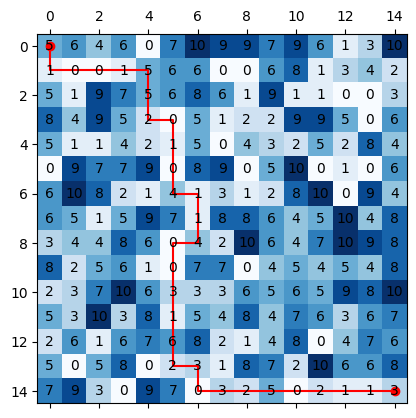

In [ ]:
fig, ax = plt.subplots()

ax.matshow(matrix, cmap=plt.cm.Blues)

for i in range(n):
    for j in range(m):
        c = matrix[j][i]
        ax.text(i, j, str(c), va='center', ha='center')

i_list = []
j_list = []

for i in path:
    i_list.append(i[1])
    j_list.append(i[0])

# print(i_list, j_list)
ax.plot(i_list, j_list, 'r')
ax.plot(start_j, start_i, 'ro')
ax.plot(stop_j, stop_i, 'ro')